# The Demo of $S^2$Generator for Series-Symbol Data Generation

Time series data serves as the external manifestation of complex dynamical systems. This method aims to generate diverse complex systems represented by symbolic expressions $f(\cdot)$ — through unconstrained construction. It simultaneously generates excitation time series $X \in \mathbb{R} ^ {M \times L}$, which are then fed into the complex systems to produce their responses $Y=f(X) \in \mathbb{R} ^ {N \times L}$. Here, $M$, $N$ and $L$ denote the number of input channels, output channels, and series length, respectively.

**Note: Because the values of the stimulus time series can inflate or fall outside the domain of complex systems, the following examples may not work if your Python version and library version are inconsistent with ours. In this case, please adjust the random seed value in the random number generator.**

In [2]:
import numpy as np
import sys
import os

sys.path.append(os.path.abspath(".."))

# Importing data generators, parameter controllers and visualization functions
from S2Generator import Generator, SeriesParams, SymbolParams, plot_series, print_hello

print_hello()

Hello, S2Generator!
Version: 0.0.1
This is a Python package for generating time series data with symbolic representations.
For more information, please visit: https://github.com/wwhenxuan/S2Generator

   _____   ___     _____                                        _                  
  / ____| |__ \   / ____|                                      | |                 
 | (___      ) | | |  __    ___   _ __     ___   _ __    __ _  | |_    ___    _ __ 
  \___ \    / /  | | |_ |  / _ \ | '_ \   / _ \ | '__|  / _` | | __|  / _ \  | '__|
  ____) |  / /_  | |__| | |  __/ | | | | |  __/ | |    | (_| | | |_  | (_) | | |   
 |_____/  |____|  \_____|  \___| |_| |_|  \___| |_|     \__,_|  \__|  \___/  |_|                                   



In [3]:
# Adjust the parameters here
# Create a parameter controls the generation of the excitation time series
series_params = SeriesParams()

# Create a parameter controls the generation of the symbolic expression (complex systems)
symbol_params = SymbolParams()

The core of the $S^2$ data generation mechanism is to randomly construct a large number of symbolic expressions (complex systems) $f(\cdot)$ and stimulus time series $X$, and obtain the response of the complex system by inputting the stimulus into the complex system:
$$
Y = f(X)
$$
where, the sampling multivariate time series $X = \left [ x_1, x_2, \cdots, x_m \right ]  \in \mathbb{R}^{M \times L}$ and the generated multivariate time series $Y = \left [ y_1, y_2, \cdots, y_m \right ]  \in \mathbb{R}^{N \times L}$. $M$ and $N$ are the input and output dimension for the time series, $L$ is the length of points of the time series data.

After constructing the input parameters, we can complete this process end-to-end by creating a data generation object and executing the `run` method.

(73.5 add (x_0 mul (((9.38 mul cos((-0.092 add (-6.12 mul x_0)))) add (87.1 mul arctan((-0.965 add (0.973 mul rand))))) sub (8.89 mul exp(((4.49 mul log((-29.3 add (-86.2 mul x_0)))) add (-2.57 mul ((51.3 add (-55.6 mul x_0)))**2)))))))


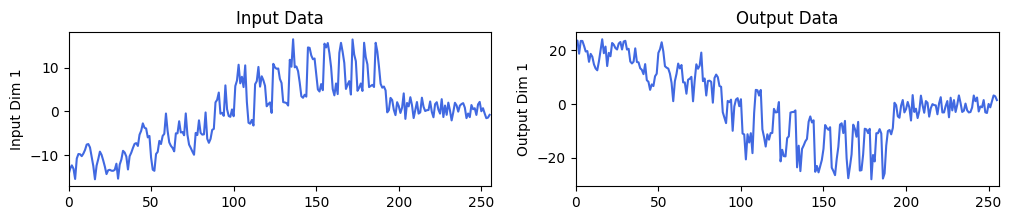

In [4]:
# Create an instance
generator = Generator(series_params=series_params, symbol_params=symbol_params)

# Creating a random number object
rng = np.random.RandomState(0)

# Start generating symbolic expressions, sampling and generating series
trees, x, y = generator.run(
    rng, input_dimension=1, output_dimension=1, n_inputs_points=256
)
# Print the expressions
print(trees)

# Visualize the time series
fig = plot_series(x, y)

(-0.302 add (-0.057 mul x_1)) | (30.1 add (((-0.21 mul sqrt((93.9 add (5.78 mul rand)))) sub (-9.86 mul x_1)) mul x_1))


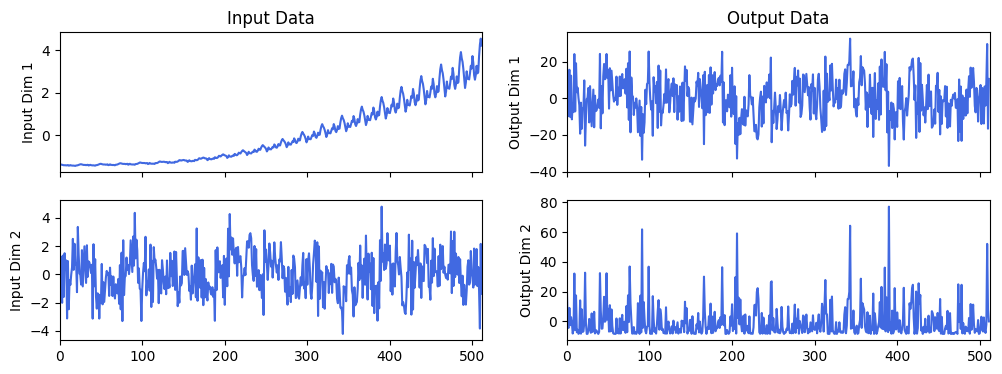

In [9]:
# Try to generate the 2-channels and longer time series
trees, x, y = generator.run(
    rng,
    input_dimension=2,
    output_dimension=2,
    n_inputs_points=512,
    output_normalize="z-score",
)
print(trees)
fig = plot_series(x, y)

(2.31 add ((((88.9 mul rand) add (-0.692 mul x_1)) add (7.13 mul rand)) sub (-0.883 mul (rand mul ((-0.216 add (0.255 mul x_1)))**2)))) | (4.39 add (8.99 mul x_2)) | (-2.35 add ((10.1 mul x_0) add ((((-52.4 mul sin((-51.3 add (-0.06 mul x_2)))) sub (0.49 mul sin((-9.33 add (2.0 mul (x_1 mul abs((67.3 add (-0.977 mul 3))))))))) sub (-6.96 mul sqrt((-0.16 add (-82.9 mul x_0))))) sub (0.286 mul x_2))))


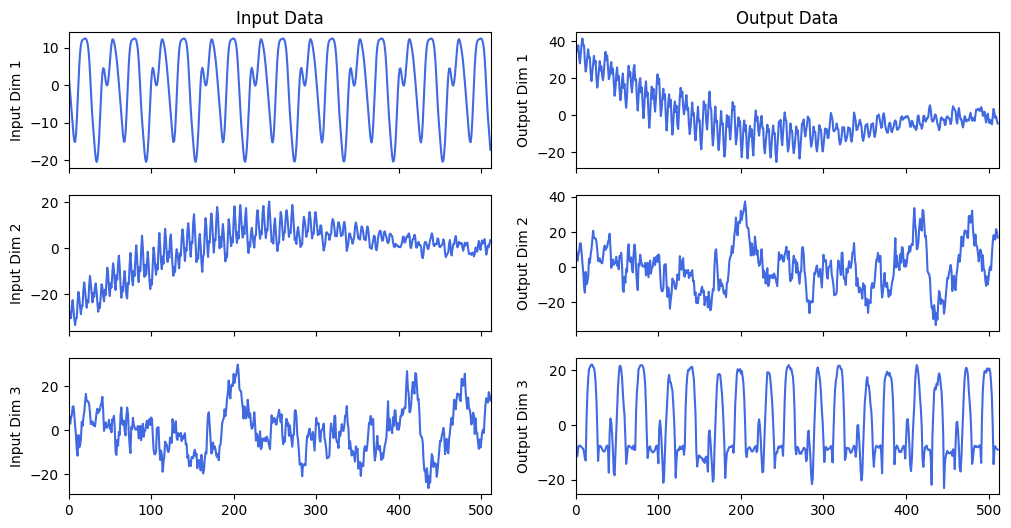

In [13]:
# Try to generate the 3-channels time series
trees, x, y = generator.run(
    rng,
    input_dimension=3,
    output_dimension=3,
    n_inputs_points=512,
    output_normalize="z-score",
)
print(trees)
fig = plot_series(x, y)

In [6]:
# Save the plotting time series
fig.savefig("../images/ID3_OD3.jpg", dpi=300, bbox_inches="tight")